In [1]:
import matplotlib.pyplot as plt
import numpy as np

from utils import *

# Задание 1

In [2]:
handler = Signal_Handler()
converter = Converter(T = 2)
display = Signal_Display(5)

In [3]:
def nonlinear_kernel(x, A):
    return A * np.exp(-x ** 2)

In [4]:
def linear_kernel(x, k, b):
    return k * x + b

In [5]:
x, y, dt      = handler.make_signal('rect',  interval = (-4, 4), A = 1, w = converter.w)
x_k1, y_k1, _ = handler.make_signal('other', interval = (-4, 4), func = lambda x: nonlinear_kernel(x, A = 2))
x_k2, y_k2, _ = handler.make_signal('other', interval = (-4, 4), func = lambda x: linear_kernel(x, k = 2, b = 3))

In [6]:
y_conv1 = np.convolve(y, y_k1, mode = 'same') / np.sum(y_k1)
y_conv2 = np.convolve(y, y_k2, mode = 'same') / np.sum(y_k2)

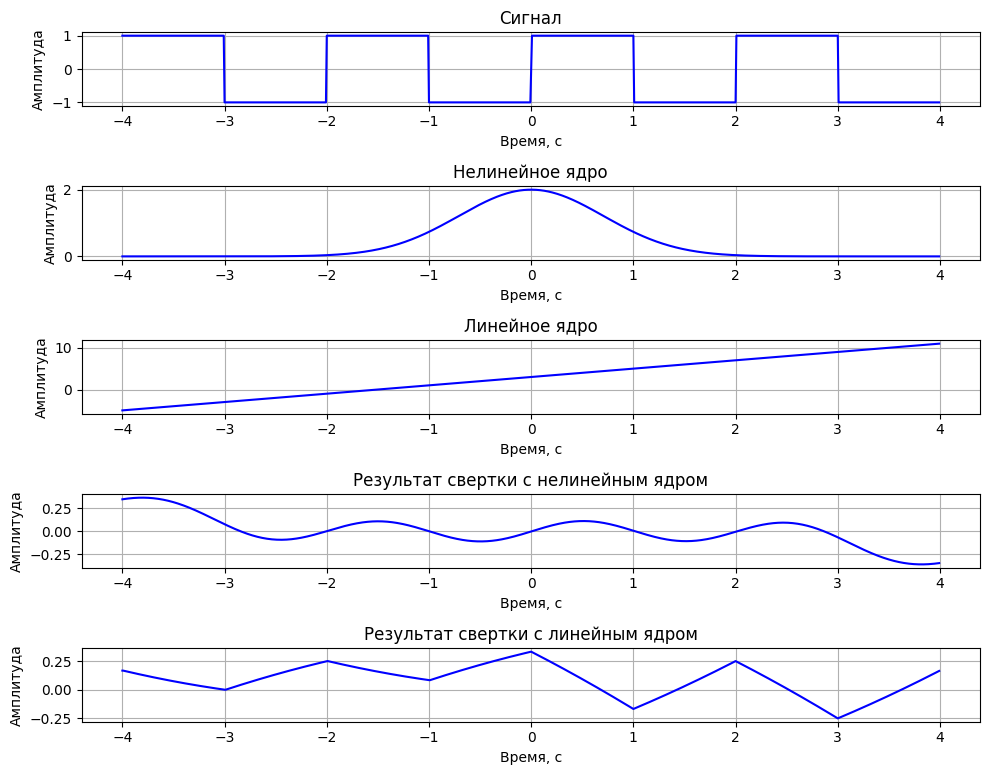

In [7]:
display.make_plot(0, x, y, title = 'Сигнал')
display.make_plot(1, x_k1, y_k1, title = 'Нелинейное ядро')
display.make_plot(2, x_k2, y_k2, title = 'Линейное ядро')
display.make_plot(3, x, y_conv1, title = 'Результат свертки с нелинейным ядром')
display.make_plot(4, x, y_conv2, title = 'Результат свертки с линейным ядром')

display.plot()

# Задание 2

In [8]:
def conv(signal, kernel, mode = 'full'):
    
    res_len = {'full': len(x) + len(y) - 1,
               'same': max(len(x), len(y)),
               'valid': max(len(x), len(y)) - min(len(x), len(y)) + 1}

    conv_res = np.array([
        np.dot(signal[max(0, i) : min(i + len(kernel), len(signal))],
               kernel[max(-i, 0) : len(signal) - i * (len(signal) - len(kernel) < i)]) 
               for i in range(1 - len(kernel), len(signal))
               ])

    if mode == 'full':
        return conv_res
    
    if mode in ['same', 'valid']:
        start_index = int(np.floor((res_len['full'] - res_len[mode]) / 2))
        return conv_res[start_index : start_index + res_len[mode]]

In [9]:
y_conv = conv(y, y_k1, mode = 'same') / np.sum(y_k1)

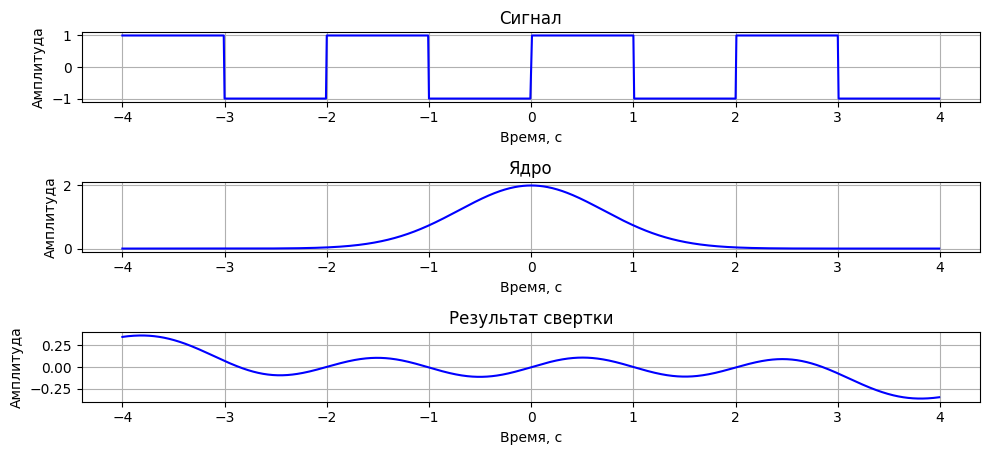

In [10]:
display.clear(3)

display.make_plot(0, x, y, title = 'Сигнал')
display.make_plot(1, x_k1, y_k1, title = 'Ядро')
display.make_plot(2, x, y_conv, title = 'Результат свертки')

display.plot()

# Задание 3

In [11]:
def fft_conv(signal, kernel, mode = 'full'):
    handler = Signal_Handler()

    res_len = {'full': len(x) + len(y) - 1,
               'same': max(len(x), len(y)),
               'valid': max(len(x), len(y)) - min(len(x), len(y)) + 1}

    signal = np.pad(signal, (0, res_len['full'] - len(signal)), 'constant')
    kernel = np.pad(kernel, (0, res_len['full'] - len(kernel)), 'constant')
        
    _, yf_s = handler.find_spectrum(signal, 1)
    _, yf_k = handler.find_spectrum(kernel, 1)

    conv_res = ifft(yf_s * yf_k)

    if mode == 'full':
        return conv_res
    
    if mode in ['same', 'valid']:
        start_index = int(np.floor((res_len['full'] - res_len[mode]) / 2))
        return conv_res[start_index : start_index + res_len[mode]]

In [12]:
y_conv = fft_conv(y, y_k1, mode = 'same') / np.sum(y_k1)

c:\Users\Sanya\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


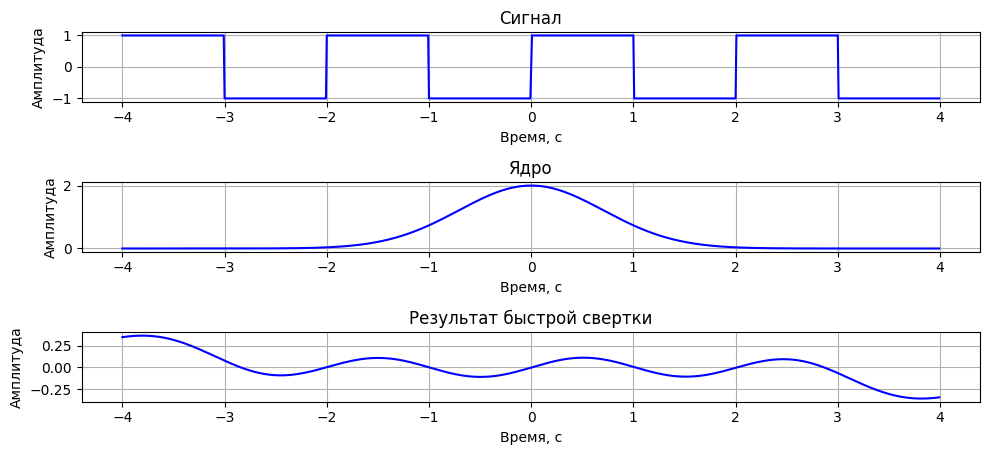

In [13]:
display.clear(3)

display.make_plot(0, x, y, title = 'Сигнал')
display.make_plot(1, x_k1, y_k1, title = 'Ядро')
display.make_plot(2, x, y_conv, title = 'Результат быстрой свертки')

display.plot()

# Задание 4

In [14]:
def Gaussian_kernel(x, sigma):
    k = 1 / (np.sqrt(2 * np.pi) * sigma)
    return k * np.exp(-x ** 2 / (2 * sigma ** 2))

In [15]:
x_k, y_k, _ = handler.make_signal('other', interval = (-4, 4), func = lambda t: Gaussian_kernel(t, sigma = 0.5))
y_conv = np.convolve(y, y_k, mode = 'same') / np.sum(y_k)

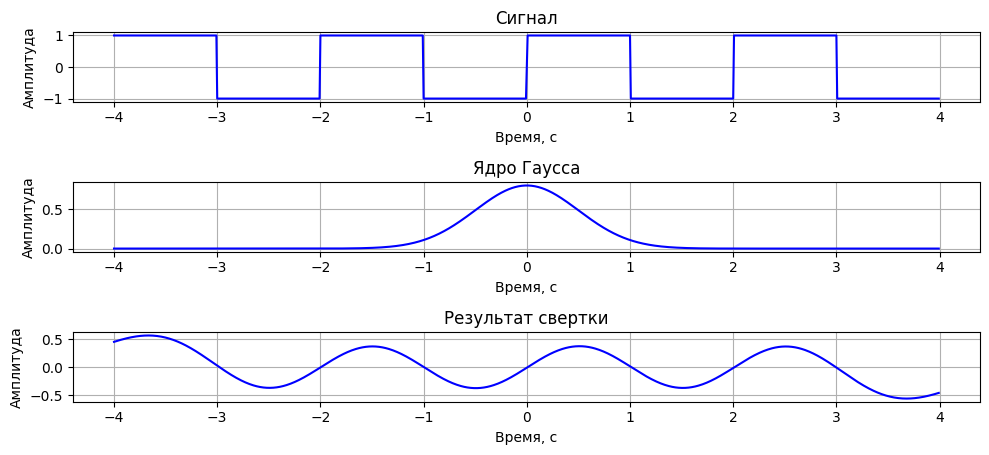

In [16]:
display.clear(3)

display.make_plot(0, x, y, title = 'Сигнал')
display.make_plot(1, x_k, y_k, title = 'Ядро Гаусса')
display.make_plot(2, x, y_conv, title = 'Результат свертки')

display.plot()

# Задание 5

In [17]:
y_conv = fft_conv(y, y_k, mode = 'same') / np.sum(y_k)

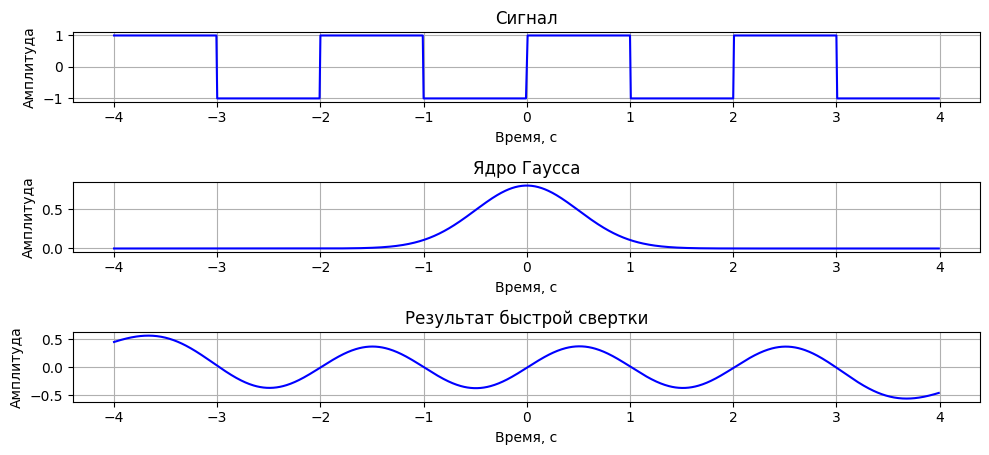

In [18]:
display.clear(3)

display.make_plot(0, x, y, title = 'Сигнал')
display.make_plot(1, x_k, y_k, title = 'Ядро Гаусса')
display.make_plot(2, x, y_conv, title = 'Результат быстрой свертки')

display.plot()

In [19]:
x, y, dt = handler.make_signal('cos', interval = (0, 0.1), A = 1, w = Converter(f = [50, 150, 450]).w)
x_k, y_k, _ = handler.make_signal('other', interval = (0, 0.1), func = lambda t: Gaussian_kernel(t, sigma = 0.5))

In [20]:
y_conv = np.convolve(y, y_k, mode = 'same')

In [21]:
x_f, y_f0 = handler.find_spectrum(y, dt)
_, y_f1 = handler.find_spectrum(y_conv, dt)

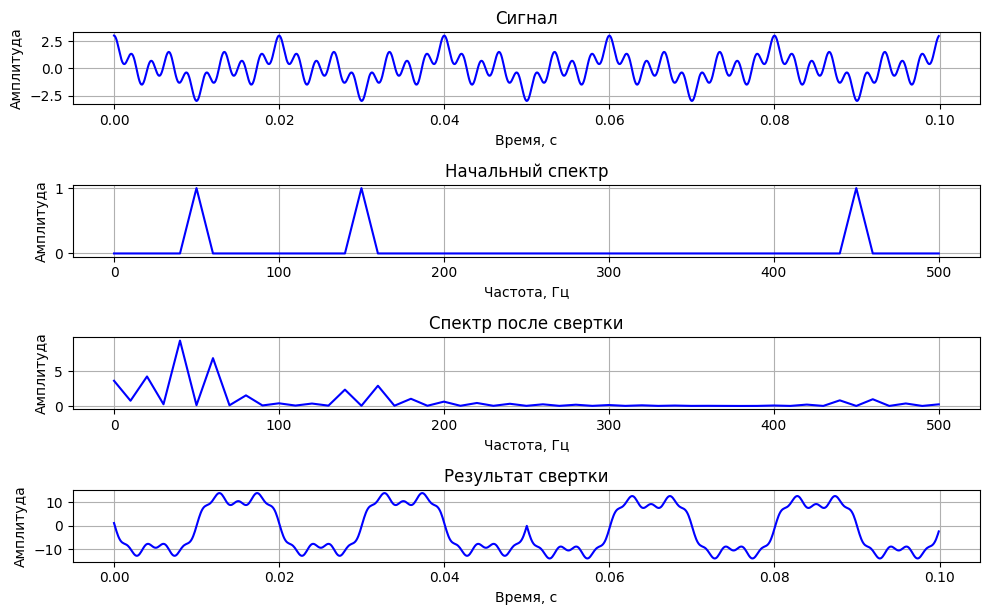

In [22]:
display.clear(4)

display.make_plot(0, x, y, title = 'Сигнал')
display.make_plot(1, x_f, y_f0, title = 'Начальный спектр', is_spectrum = True, interval = (0, 500))
display.make_plot(2, x_f, y_f1, title = 'Спектр после свертки', is_spectrum = True, interval = (0, 500))
display.make_plot(3, x, y_conv, title = 'Результат свертки')

display.plot()